为什么linearSVC可以选择loss函数，而SVC没有这个选项呢o_O。<br>支持向量机其实就是让决策边界与支持向</br>量之间的间距尽量大，其中我现在所知的就是通过hinge等的损失函数完成这一过程，还是写一下吧。。。
$J(\theta)=C\displaystyle \sum_{i=0}^{i=m}[y^{(i)}cost_{1}(Z)+(1-y^{(i)})cost_{0}(Z)]+\frac {1}{2}\displaystyle\sum_{j=1}^{j=n}\theta_i^2$<br>
C是惩罚因子，C越大偏差越小，但方差越大，反之亦然。其中$cost_{1}(Z)$和$cost_{0}(Z)$为hinge函数，为了减小损失$Z>1\,\, if\,\, y=1$、$Z<-1\,\, if\,\, y=0$(这与hinge函数的性质有关)<br>$Z=X\theta^T$，Z=1和Z=-1是平行的，他们之间的margin是$\frac {2} {\mid\mid w\mid\mid}$，我们的任务是$min\frac 12\displaystyle\sum_{j=1}^{j=n}\theta_i^2$，而$\mid\mid w\mid\mid$就等于$\sqrt{\displaystyle\sum_{j=1}^{j=n}\theta_i^2}$，故margin会尽量的大。<br>
SVM还可以通过运用核函数将数据扩展的高维空间以此来完成非线性分类。其中常用的有Gaussian kernel，$k(x,y)=e^{-\gamma \mid\mid x-y \mid\mid ^2}$，其中的$\gamma$可以看作被模型选中作为支持向量的样本的影响半径的倒数。$\gamma$越大，模型的偏差越小方差越大。试想一下如果$\gamma$无限大，那么每个点的影响半径就非常的小，因为k(x,y)约为0，那么每个样本在高维空间就可以表示为1，0，0，0，… 1，0，0 …的形式，那么得出来的θ就会只与那个‘1’有关， 它的拟合效果是非常好的，因为各个θ间近乎是独立的，虽然它的拟合效果很好，但他的泛化性肯定是非常差的，因为θ的得到都像是训练集的附属属性一样，并没有显示出规律。

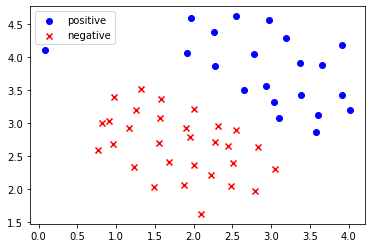

(51, 2)


In [26]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd

data = loadmat('ex6data1.mat')
X = data['X']
y = data['y']
df = pd.DataFrame(X)
df.insert(2, df.shape[1], y)
pos = df[df[2] == 1]
neg = df[df[2] == 0]
plt.scatter(pos[0], pos[1], color='blue', label='positive', marker='o')
plt.scatter(neg[0], neg[1], color='red', label='negative', marker='x')
plt.legend()
plt.show()

0.9803921568627451


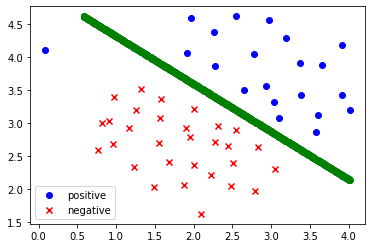

In [139]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
import numpy as np

data = loadmat('ex6data1.mat')
X = data['X']
y = data['y']
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=10000)
svc.fit(X,np.ravel(y))
print(svc.score(X,np.ravel(y)))

x1 = np.linspace(X[:,0].min(), X[:,0].max(), 1000)
x2 = np.linspace(X[:,1].min(), X[:,1].max(), 1000)
coor = [(x, y) for x in x1 for y in x2]
x1_co, x2_co = zip(*coor)
ex_df = pd.DataFrame({'x1':x1_co, 'x2':x2_co})
ex_df['value'] = svc.decision_function(ex_df[['x1','x2']])

line = ex_df[np.abs(ex_df['value']) < 0.001]

df = pd.DataFrame(X)
df.insert(2, df.shape[1], y)
pos = df[df[2] == 1]
neg = df[df[2] == 0]
plt.scatter(pos[0], pos[1], color='blue', label='positive', marker='o')
plt.scatter(neg[0], neg[1], color='red', label='negative', marker='x')
plt.scatter(line['x1'], line['x2'], color='green')
plt.legend()
plt.show()

由下图可以看出，gamma越大，C越大，模型的bias越小，variance越大。

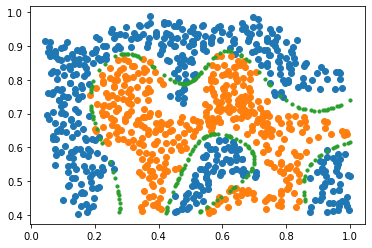

In [153]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
import numpy as np

data = loadmat('ex6data2.mat')
X = data['X']
y = data['y']

df = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1], 'y':np.ravel(y)})
pos = df[df['y'] == 1]
neg = df[df['y'] == 0]
plt.scatter(pos['x1'], pos['x2'])
plt.scatter(neg['x1'], neg['x2'])

svc = svm.SVC(C=100,kernel='rbf',gamma=10)
svc.fit(df[['x1','x2']], df['y'])
# svc.score(df[['x1','x2']], df['y'])
x1 = np.linspace(df['x1'].min(), df['x1'].max(), 1000)
x2 = np.linspace(df['x2'].min(), df['x2'].max(), 1000)
coo = [(x,y) for x in x1 for y in x2]
x_co, y_co = zip(*coo)

co_df = pd.DataFrame({'x1':x_co, 'x2':y_co})
co_df['val'] = svc.decision_function(co_df[['x1','x2']])
line = co_df[np.abs(co_df['val']) < 0.001]
plt.scatter(line['x1'], line['x2'],s=10)
plt.show()

0.965
1.0149748743718594 55.28085427135677


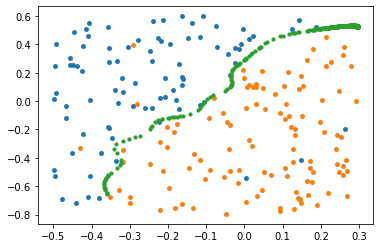

In [184]:
from scipy.io import loadmat
from sklearn import svm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = loadmat('ex6data3.mat')
X, y, Xval, yval = data['X'], data['y'], data['Xval'], data['yval']

C_l = np.linspace(0.01, 200, 200)
G_l = np.linspace(0.01, 100, 200)
best_score, C, G = 0, 0, 0
for c in C_l:
    for g in G_l:
        svc = svm.SVC(C=c, gamma=g, kernel='rbf')
        svc.fit(X, y.ravel())
        score = svc.score(Xval, yval.ravel())
        if score > best_score:
            best_score = score
            C, G = c, g

svc = svm.SVC(C=C, gamma=g, kernel='rbf').fit(X, y.ravel())
print(svc.score(Xval, yval.ravel()))
print(C, G)
df_val = pd.DataFrame({'x1':Xval[:,0], 'x2':Xval[:,1], 'y':yval.ravel()})
pos_val = df_val[df_val['y']==1]
neg_val = df_val[df_val['y']==0]

plt.scatter(pos_val['x1'], pos_val['x2'], s=15)
plt.scatter(neg_val['x1'], neg_val['x2'], s=15)
x1 = np.linspace(df['x1'].min(), df['x1'].max(), 1000)
x2 = np.linspace(df['x2'].min(), df['x2'].max(), 1000)
coo = [(x,y) for x in x1 for y in x2]
x_co, y_co = zip(*coo)

co_df = pd.DataFrame({'x1':x_co, 'x2':y_co})
co_df['val'] = svc.decision_function(co_df[['x1','x2']])
line = co_df[np.abs(co_df['val']) < 0.001]
plt.scatter(line['x1'], line['x2'],s=10)
plt.show()

做一个垃圾邮件的分类器，主要方法就是将一封邮件转换为向量的形式，将其中出现的在垃圾邮件中出现频率较高的记录，然后训练。其中还有很多因素需要考虑，比如单词的拼写，单词的大小写，标点符号的使用等等。

In [237]:
from scipy.io import loadmat
from sklearn import svm
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = loadmat('spamTrain.mat')
data_T = loadmat('spamTest.mat')
X, y = data['X'], data['y']
Xtest, ytest = data_T['Xtest'], data_T['ytest']
vocab = pd.read_csv('vocab.txt',sep='\t', header=None)
vocab = vocab.drop(columns=[0])

svc = svm.SVC()
svc.fit(X, y.ravel())
df = pd.DataFrame(Xtest)
df['val'] = svc.decision_function(Xtest)
for idx, row in df.iterrows():
    if df.loc[idx, 'val'] < 0:
        df.loc[idx, 'val'] = 0
    else:
        df.loc[idx, 'val'] = 1
print(classification_report(df['val'], ytest.ravel()))

kw = np.eye(X.shape[1])
kwdf = pd.DataFrame({'val':svc.decision_function(kw)})
spamvoc = vocab.iloc[list(kwdf['val'] > -0.09)]
print(spamvoc[1])

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       699
         1.0       0.97      0.99      0.98       301

    accuracy                           0.99      1000
   macro avg       0.98      0.99      0.98      1000
weighted avg       0.99      0.99      0.99      1000

1             ab
6        absolut
10        access
12       account
20            ad
          ...   
1881         www
1888        year
1892         you
1894        your
1895    yourself
Name: 1, Length: 439, dtype: object
